# BT2101 Deep Learning With Tensorflow and Keras

#### This notebook should run in Python 3.5+ version.

## 1 Goal

In this notebook, we will explore deep learning and Tensorflow. <br/>

First of all, students should understand machine learning basic knowledge. And then, students can expect to practice machine learning and deep learning models in Tensorflow. More information can be found at https://www.tensorflow.org/install/ and https://keras.io/.

Make sure you have already installed tensorflow in your computing, and then you are able to install Keras. **Note that Tensorflow only supports Python 3.5+ version.** If you installed Python 2.7 version in your computer, you could:
* Create a new virtual environment with Python 3.5+ in Anaconda 
* Activate this virtual environment
* Install Tensorflow CPU version in this virtual environment
* Open Python in this virtual environment and type `import tensorflow as tf`
* Installation of Tensorflow succeeds if there is not error message returns

In [3]:
# -*- coding:utf-8 -*-
# Check whether tensorflow is installed
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


### 1.1 Machine Learning Types

Basic machine learning methods include:

1. Supervised Learning

The algorithm consists of a target/outcome variable (or dependent variable) which is to be predicted from a given set of predictors (independent variables). Examples include regression, decision tree and KNN.

2. Unsupervised Learning

The algorithm does not have any target or outcome variable to predict/estimate. It is used for clustering population in different groups, which is widely used for segmenting customers in different groups for specific intervention. Examples include K-means clustering.

3. Reinforcement Learning

The algorithm trains a machine to make specific decisions. A machine is exposed to an environment where it trains itself continually using trial and error. Examples include Markov Chain Process.

### 1.2 Installing Tensorflow and Keras

To get started, install the Tensorflow (CPU version by default or GPU version) in your PC. You need to follow the guide here: https://www.tensorflow.org/install/.
* Windows: https://www.tensorflow.org/install/install_windows
* Linux: https://www.tensorflow.org/install/install_linux
* Mac OS: https://www.tensorflow.org/install/install_mac

Next, you need to install Keras. Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. You need to follow the guide here: https://keras.io/#installation. After installation, let us try a simple model using Keras.

#### Getting started: 30 seconds to Keras
Source: https://keras.io/#getting-started-30-seconds-to-keras <br/>
Note: This section is the same as the content in the above link. It simply shows how to setup and train a neural network model. 

The core data structure of Keras is a model, a way to organize layers. The simplest type of model is the `Sequential` model, a linear stack of layers. For more complex architectures, you should use the Keras functional API, which allows to build arbitrary graphs of layers.

Here is the `Sequential` model:

```python
from keras.models import Sequential
model = Sequential()
```

Stacking layers is as easy as `.add()`:

```python
from keras.layers import Dense
model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=10, activation='softmax'))
```

Once your model looks good, configure its learning process with `.compile()`:

```python
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
```

If you need to, you can further configure your optimizer. A core principle of Keras is to make things reasonably simple, while allowing the user to be fully in control when they need to (the ultimate control being the easy extensibility of the source code).

```python
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True))
```

You can now iterate on your training data in batches:

```python
# x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
model.fit(x_train, y_train, epochs=5, batch_size=32)
```

Alternatively, you can feed batches to your model manually:

```python
model.train_on_batch(x_batch, y_batch)
```

Evaluate your performance in one line:

```python
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
```

Or generate predictions on new data:

```python
classes = model.predict(x_test, batch_size=128)
```

Building a question answering system, an image classification model, a Neural Turing Machine, or any other model is just as fast. The ideas behind deep learning are simple, so why should their implementation be painful?

For a more in-depth tutorial about Keras, you can check out:

* [Getting started with the Sequential model](https://keras.io/getting-started/sequential-model-guide)
* [Getting started with the functional API](https://keras.io/getting-started/functional-api-guide)

In the [examples folder](https://github.com/keras-team/keras/tree/master/examples) of the repository, you will find more advanced models: question-answering with memory networks, text generation with stacked LSTMs, etc.

## 2 Experiment Using Keras

### Case I: Multi-class Classification

We are going to practice with handwritten digital from MINIST dataset, which is the representative data to explore machine learning techniques. We are going to practice to learn the basics of Keras by walking through a simple example: MINIST consists of $28\times28$ grayscale images of handwritten digits like these:

<img src="https://cdn-images-1.medium.com/max/1600/1*_4Ua9Zp84He8OxlZ4cy0DQ@2x.png" width="500">

The dataset also includes labels for each image, telling us which digit it is. For example, the labels for the above images are 5, 0, 4, and 1.

In [1]:
# Load packages
import numpy as np
import scipy
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from __future__ import division
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\bensj\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Load the MNIST data
from keras.datasets import mnist

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Ths X data is a 3D Array (images, width, height) of grayscale values. To prepare the data for training, we should convert the 3D Array to matrices by reshaping width and height into a single dimension (i.e., $28\times28$ images are flatterned into length 784 vectors). Then, we rescale the grayscale values from integers ranging between 0 to 255 into floating point values ranging between 0 and 1.

In [4]:
x_train_new = x_train.reshape(x_train.shape[0], 784) / 255
x_test_new = x_test.reshape(x_test.shape[0], 784) / 255

The y data is an integer vector with values ranging from 0 to 9. To prepare this data for training we should encode the vectors into binary class matrices using the Keras function `to_categorical()`.

In [5]:
y_train_new = keras.utils.to_categorical(y_train, 10)
y_test_new = keras.utils.to_categorical(y_test, 10)

In [6]:
# Then we can try the sequential model
model = Sequential()

# First hidden layer
model.add(Dense(units=256, activation='relu', input_dim=784))
model.add(Dropout(0.4))

# Second hidden layer
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(units=10, activation='sigmoid'))

# The argument for the first layer specifies the shape of the input data (a length 784 numeric vector representing a grayscale image). 
# The final layer outputs a length 10 numeric vector (probabilities for each digit) using a softmax activation function.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


#### Some activation functions:

<img src="https://cdn-images-1.medium.com/max/1600/1*p_hyqAtyI8pbt2kEl6siOQ.png" width="900">

In [7]:
# Then we can compile the model with appropriate loss function, optimizer and metrics 
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.rmsprop(), metrics=['accuracy'])

In [8]:
# Train the model with 30 epochs and batches of 128 images
history = model.fit(x_train_new, y_train_new, epochs=15, batch_size=128, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 5s 113us/step - loss: 0.5110 - acc: 0.8471 - val_loss: 0.1707 - val_acc: 0.9498
Epoch 2/15
48000/48000 [==============================] - 5s 110us/step - loss: 0.2194 - acc: 0.9372 - val_loss: 0.1267 - val_acc: 0.9623
Epoch 3/15
48000/48000 [==============================] - 5s 107us/step - loss: 0.1649 - acc: 0.9524 - val_loss: 0.1092 - val_acc: 0.9681
Epoch 4/15
48000/48000 [==============================] - 5s 111us/step - loss: 0.1397 - acc: 0.9594 - val_loss: 0.1017 - val_acc: 0.9731
Epoch 5/15
48000/48000 [==============================] - 5s 108us/step - loss: 0.1213 - acc: 0.9646 - val_loss: 0.0946 - val_acc: 0.9747
Epoch 6/15
48000/48000 [==============================] - 5s 111us/step - loss: 0.1105 - acc: 0.9681 - val_loss: 0.0959 - val_acc: 0.9744
Epoch 7/15
48000/48000 [==============================] - 5s 111us/step - loss: 0.1036 - acc: 0.9701 - val_loss: 0.0959 - 

In [9]:
# Evaluate model performance on test data
loss_and_metrics = model.evaluate(x_test_new, y_test_new, batch_size=128)
loss_and_metrics #[loss, accuracy]

10000/10000 [==============================] - 0s 32us/step


[0.08292669890983961, 0.9801]

In [10]:
# Make predictions on test data
probabilities = model.predict(x_test_new, batch_size=128)
classes = probabilities.argmax(axis=-1)
classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

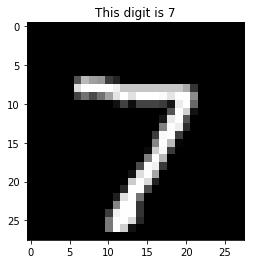

In [11]:
# What does the first image in x_test_new look like
# Whether we predict it correctly?
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

plt.imshow(np.array(x_test_new[0,:]).reshape((28, 28)), cmap="gray")
plt.title("This digit is %d" % classes[0])
plt.show()

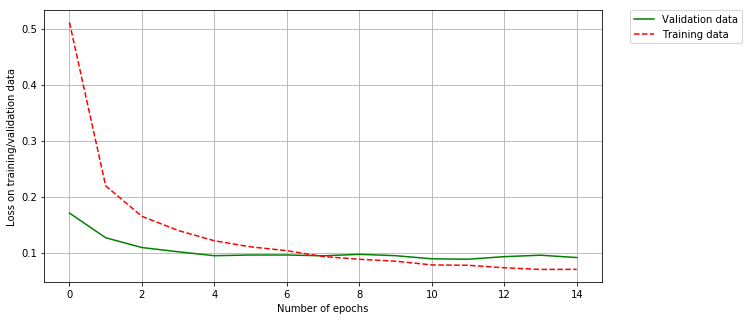

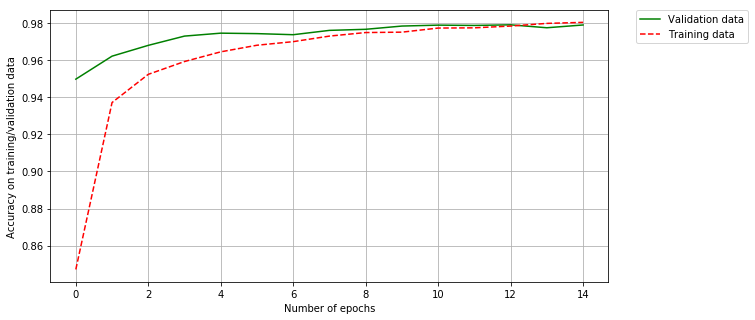

In [12]:
# Plot loss and accuracy 
fig = plt.figure(figsize=(10,5))

#plt.subplot(1, 2, 1)
plt.plot(history.epoch, history.history['val_loss'], 'g-', label='Validation data')
plt.plot(history.epoch, history.history['loss'], 'r--', label='Training data')
plt.grid(True)
plt.xlabel('Number of epochs')
plt.ylabel('Loss on training/validation data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#plt.subplot(1, 2, 2)
fig = plt.figure(figsize=(10,5))
plt.plot(history.epoch, history.history['val_acc'], 'g-', label='Validation data')
plt.plot(history.epoch, history.history['acc'], 'r--', label='Training data')
plt.grid(True)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy on training/validation data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Case II: Regression 

We are going to practice with regression problem. In regression, usually output is continuous and numerical, which is different from classification problem.

The example here is based on the case in ["Machine Learning with Python Cookbook"](#3-References). The codes here are revised and different from the original ones.

In [13]:
# import packages and load dataset
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=10000, n_features=3, n_informative=3, n_targets=1, noise=0.0, random_state=0)

In [14]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
# Setup neural network
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=1))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,217
Trainable params: 1,217
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Complile the model: based on mean-squared-error metrics
model.compile(loss='mse', optimizer=keras.optimizers.rmsprop(), metrics=['mse'])

In [17]:
# Train and fit the neural network
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))

Train on 7000 samples, validate on 3000 samples
Epoch 1/10
7000/7000 [==============================] - 1s 90us/step - loss: 17383.3325 - mean_squared_error: 17383.3325 - val_loss: 18116.1301 - val_mean_squared_error: 18116.1301
Epoch 2/10
7000/7000 [==============================] - 0s 28us/step - loss: 16723.8848 - mean_squared_error: 16723.8848 - val_loss: 17017.2518 - val_mean_squared_error: 17017.2518
Epoch 3/10
7000/7000 [==============================] - 0s 22us/step - loss: 15234.0249 - mean_squared_error: 15234.0249 - val_loss: 14954.7518 - val_mean_squared_error: 14954.7518
Epoch 4/10
7000/7000 [==============================] - 0s 22us/step - loss: 12813.8398 - mean_squared_error: 12813.8398 - val_loss: 11887.8942 - val_mean_squared_error: 11887.8942
Epoch 5/10
7000/7000 [==============================] - 0s 22us/step - loss: 9696.4356 - mean_squared_error: 9696.4356 - val_loss: 8172.4983 - val_mean_squared_error: 8172.4983
Epoch 6/10
7000/7000 [=============================

In [18]:
history.history

{'val_loss': [18116.130143229166,
  17017.251822916667,
  14954.751822916667,
  11887.89423828125,
  8172.49833984375,
  4371.642854817708,
  1629.115861002604,
  708.843505859375,
  594.3846893310547,
  519.7228017171224],
 'val_mean_squared_error': [18116.130143229166,
  17017.251822916667,
  14954.751822916667,
  11887.89423828125,
  8172.49833984375,
  4371.642854817708,
  1629.115861002604,
  708.843505859375,
  594.3846893310547,
  519.7228017171224],
 'loss': [17383.33247767857,
  16723.884779575892,
  15234.02490234375,
  12813.839829799108,
  9696.435602678572,
  6161.368913922991,
  3335.1074236188615,
  1979.8897251674107,
  1706.5885323660714,
  1736.0244707380023],
 'mean_squared_error': [17383.33247767857,
  16723.884779575892,
  15234.02490234375,
  12813.839829799108,
  9696.435602678572,
  6161.368913922991,
  3335.1074236188615,
  1979.8897251674107,
  1706.5885323660714,
  1736.0244707380023]}

In [19]:
# Evaluate model performance on test data
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=100)
loss_and_metrics #mse

3000/3000 [==============================] - 0s 10us/step


[519.7228017171224, 519.7228017171224]

In [20]:
# Make predictions on test data
predict_output = model.predict(X_test, batch_size=100)
predict_output

array([[  98.068085],
       [ -91.50046 ],
       [-178.48024 ],
       ...,
       [-179.88345 ],
       [ -45.18769 ],
       [-145.73886 ]], dtype=float32)

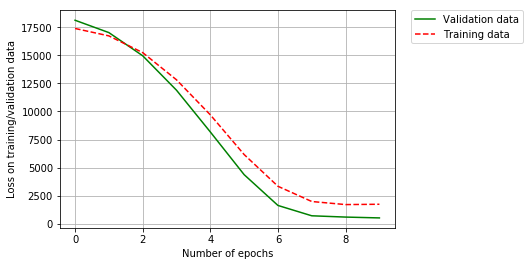

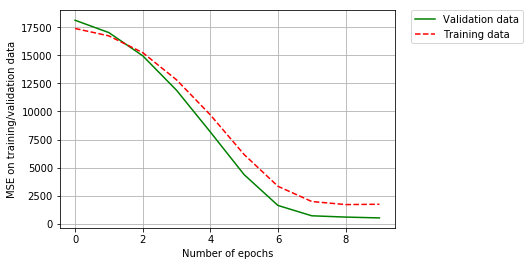

In [21]:
# Plot loss and accuracy 
fig = plt.figure()

#plt.subplot(1, 2, 1)
plt.plot(history.epoch, history.history['val_loss'], 'g-', label='Validation data')
plt.plot(history.epoch, history.history['loss'], 'r--', label='Training data')
plt.grid(True)
plt.xlabel('Number of epochs')
plt.ylabel('Loss on training/validation data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#plt.subplot(1, 2, 2)
plt.plot(history.epoch, history.history['val_mean_squared_error'], 'g-', label='Validation data')
plt.plot(history.epoch, history.history['mean_squared_error'], 'r--', label='Training data')
plt.grid(True)
plt.xlabel('Number of epochs')
plt.ylabel('MSE on training/validation data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Now it is your turn. Read Tensorflow and Keras documents and examples. Familiarize yourself with applications of neural network models. 

## 3 Assignments (5 points)

### Purpose of this assignment is to familiarize yourself with tensorflow and keras

#### Dataset on Hand Writen Digits: The same dataset used in Tutorial 3 Ensemble Learning. Remember in tutorial 3, the accuracy of single decision tree model is about 86%, bagging model 95%, random forest model 96%. Let us check the performance of neural network model

**Dataset:**

The Kaggle competition dataset can be obtained from https://www.kaggle.com/c/digit-recognizer/data.

**Overview:**

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

**Acknowlegements:**

More details about the dataset, including algorithms that have been tried on it and their levels of success, can be found at http://yann.lecun.com/exdb/mnist/index.html. The dataset is made available under a Creative Commons Attribution-Share Alike 3.0 license.

**Attributes:**

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

The evaluation metric for this contest is the categorization accuracy, or the proportion of test images that are correctly classified. For example, a categorization accuracy of 0.97 indicates that you have correctly classified all but 3% of the images.

In [30]:
# Load packages
import numpy as np
import pandas as pd
import scipy
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from __future__ import division
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
# Load dataset: You need to download dataset first
%pwd
train = pd.read_csv('./train.csv')

In [32]:
# 42,000 pictures; Each picture is composed of 28*28 dimensional pixels
train.shape

(42000, 785)

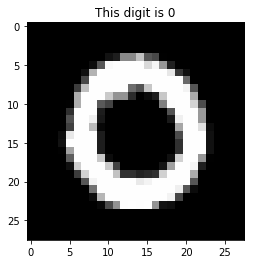

In [33]:
# What does an image look like
plt.imshow(np.array(train.iloc[1,1:]).reshape((28, 28)), cmap="gray")
plt.title("This digit is %d" % train.iloc[1,0])
plt.show()

In [34]:
# Transform features and outputs
train_feature = train.iloc[:,1:].values / 255
train_target = keras.utils.to_categorical(train.iloc[:,0], 10)

### Question 1. Create a neural network model, and show model performance (3 points)

#### Hint:
* Create a neural network in a sequential way
* Set 1st hidden layer with parameters: `units=256`, `activation='relu'`, `input_dim=784`
* Set dropout rate to 0.3
* Set 2nd hidden layer with parameters: `units=128`, `activation='relu'`
* Set dropout rate to 0.3
* Set 3rd hidden layer with parameters: `units=64`, `activation='relu'`
* Set output layer with parameters: `units=10`, `activation='sigmoid'`
* Train the model with parameters: `epochs=30`, `batch_size=128`, `validation_split=0.3`
* Compile the model with parameters: `loss='categorical_crossentropy'`, `optimizer='sgd'`, `metrics=['accuracy']`
* Sample code:

```python

# Then we can try the sequential model
model = Sequential()
model.add(Dense(units=256, activation='relu', input_dim=784))
model.add(Dropout(0.4))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=10, activation='softmax'))

# The argument for the first layer specifies the shape of the input data (a length 784 numeric vector representing a grayscale image). 
# The final layer outputs a length 10 numeric vector (probabilities for each digit) using a softmax activation function.
model.summary()

# Then we can compile the model with appropriate loss function, optimizer and metrics 
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.rmsprop(), metrics=['accuracy'])

# Train the model with 30 epochs and batches of 128 images
history = model.fit(x_train_new, y_train_new, epochs=30, batch_size=128, validation_split=0.3)

# Evaluate model performance on test data
loss_and_metrics = model.evaluate(x_test_new, y_test_new, batch_size=128)
loss_and_metrics #[loss, accuracy]

```

References: https://keras.io/activations/

In [35]:
# Then we can try the sequential model
model = Sequential()

# First layer
# Write your code here
model.add(Dense(units=256, activation='relu', input_dim=784))
model.add(Dropout(0.3))

# Second layer
# Write your code here
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))

# Third layer
# Write your code here
model.add(Dense(units=64, activation='relu'))

# Output layer
# Write your code here
model.add(Dense(units=10, activation='sigmoid'))

# The argument for the first layer specifies the shape of the input data (a length 784 numeric vector representing a grayscale image). 
# The final layer outputs a length 10 numeric vector (probabilities for each digit) using a softmax activation function.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Then we can compile the model with appropriate loss function, optimizer and metrics 
# Write your code here
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [37]:
# Train the model with 30 epochs and batches of 128 images
# Write your code here
history = model.fit(train_feature, train_target, epochs=30, batch_size=128, validation_split=0.3)

Train on 29399 samples, validate on 12601 samples
Epoch 1/30
29399/29399 [==============================] - 3s 108us/step - loss: 2.2317 - acc: 0.2160 - val_loss: 2.1035 - val_acc: 0.5281
Epoch 2/30
29399/29399 [==============================] - 3s 95us/step - loss: 1.9457 - acc: 0.4500 - val_loss: 1.4769 - val_acc: 0.7257
Epoch 3/30
29399/29399 [==============================] - 3s 92us/step - loss: 1.2773 - acc: 0.6196 - val_loss: 0.7521 - val_acc: 0.8293
Epoch 4/30
29399/29399 [==============================] - 3s 93us/step - loss: 0.8781 - acc: 0.7236 - val_loss: 0.5461 - val_acc: 0.8585
Epoch 5/30
29399/29399 [==============================] - 3s 90us/step - loss: 0.7070 - acc: 0.7780 - val_loss: 0.4567 - val_acc: 0.8760
Epoch 6/30
29399/29399 [==============================] - 3s 90us/step - loss: 0.6122 - acc: 0.8109 - val_loss: 0.4034 - val_acc: 0.8887
Epoch 7/30
29399/29399 [==============================] - 3s 91us/step - loss: 0.5543 - acc: 0.8309 - val_loss: 0.3696 - val_ac

In [38]:
# Evaluate model performance on test data
loss_and_metrics = model.evaluate(train_feature, train_target, batch_size=128)
loss_and_metrics #[loss, accuracy]

42000/42000 [==============================] - 1s 26us/step


[0.16855705261088552, 0.9497142857142857]

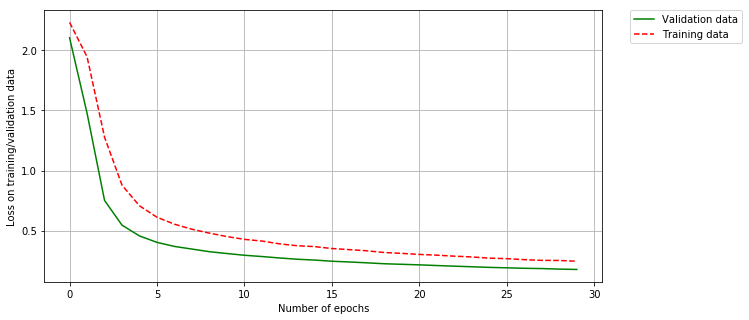

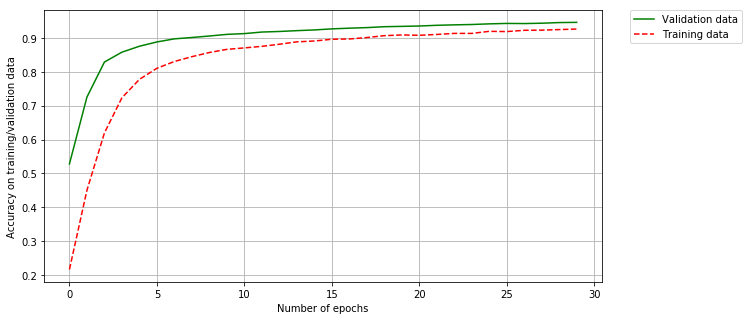

In [39]:
# Plot loss and accuracy 
fig = plt.figure(figsize=(10,5))

#plt.subplot(1, 2, 1)
plt.plot(history.epoch, history.history['val_loss'], 'g-', label='Validation data')
plt.plot(history.epoch, history.history['loss'], 'r--', label='Training data')
plt.grid(True)
plt.xlabel('Number of epochs')
plt.ylabel('Loss on training/validation data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#plt.subplot(1, 2, 2)
fig = plt.figure(figsize=(10,5))
plt.plot(history.epoch, history.history['val_acc'], 'g-', label='Validation data')
plt.plot(history.epoch, history.history['acc'], 'r--', label='Training data')
plt.grid(True)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy on training/validation data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Question 2. Predictions on the test data (1 point)

#### Hint:

* Predict class labels using `predict` function
* Sample code:

```python

# Make predictions on test data
probabilities = model.predict(x_test_new, batch_size=128)
classes = probabilities.argmax(axis=-1)
classes

```

References: https://keras.io/models/model/

In [40]:
# Import test dataset
test = pd.read_csv('./test.csv')

# Transform features and outputs
test_feature = test.iloc[:,:].values/255

In [41]:
# Make predictions on test data
# Write your code here
probabilities = model.predict(test_feature, batch_size=128)
classes = probabilities.argmax(axis=-1)
classes

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

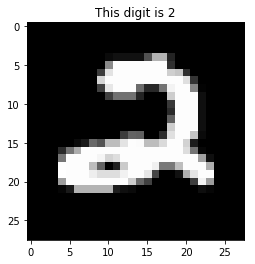

In [42]:
# What does the first image in test_feature look like
# Whether do we predict it correctly?
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

plt.imshow(np.array(test_feature[0,:]).reshape((28, 28)), cmap="gray")
plt.title("This digit is %d" % classes[0])
plt.show()

### Question 3. Does neural network model have overfit problems? If so, how do you avoid overfitting in neural network modeling? (1 point)

Yes. <br>
* We can input more data to train our model, with at least 10 times more than the degree of freedom.
* We can also make use of regularization such as adding the square of weights to the cost function (L2) to penalise features with heavier weights and prevent overfitting.

## 4 References
[1] Chris Albon. (2018). Machine Learning with Python Cookbook. O'Reilly.